<a href="https://colab.research.google.com/github/victoriafabris/disciplina-dsp-audio-video/blob/main/projeto_final/filtro_FIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from scipy import signal
import scipy.io.wavfile as wav
import math
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
from  matplotlib import patches, rcParams, figure
from google.colab import files

Audio original:

In [3]:
repository_raw_url = "https://github.com/victoriafabris/disciplina-dsp-audio-video/blob/main/projeto_final/audio-teste-ruido-Victoria.wav?raw=true"
filename = "audio-teste-ruido-Victoria.wav"
display.Audio(f"{repository_raw_url}/{filename}")

### Análise no OceanAudio



Importando o áudio disponivel neste [link](https://github.com/victoriafabris/disciplina-dsp-audio-video/tree/main/projeto_final) para o OceanAudio, fazemos sua análise. Na imagem abaixo observamos que o áudio está aproximadamente entre 1600 a 2500 Hz.

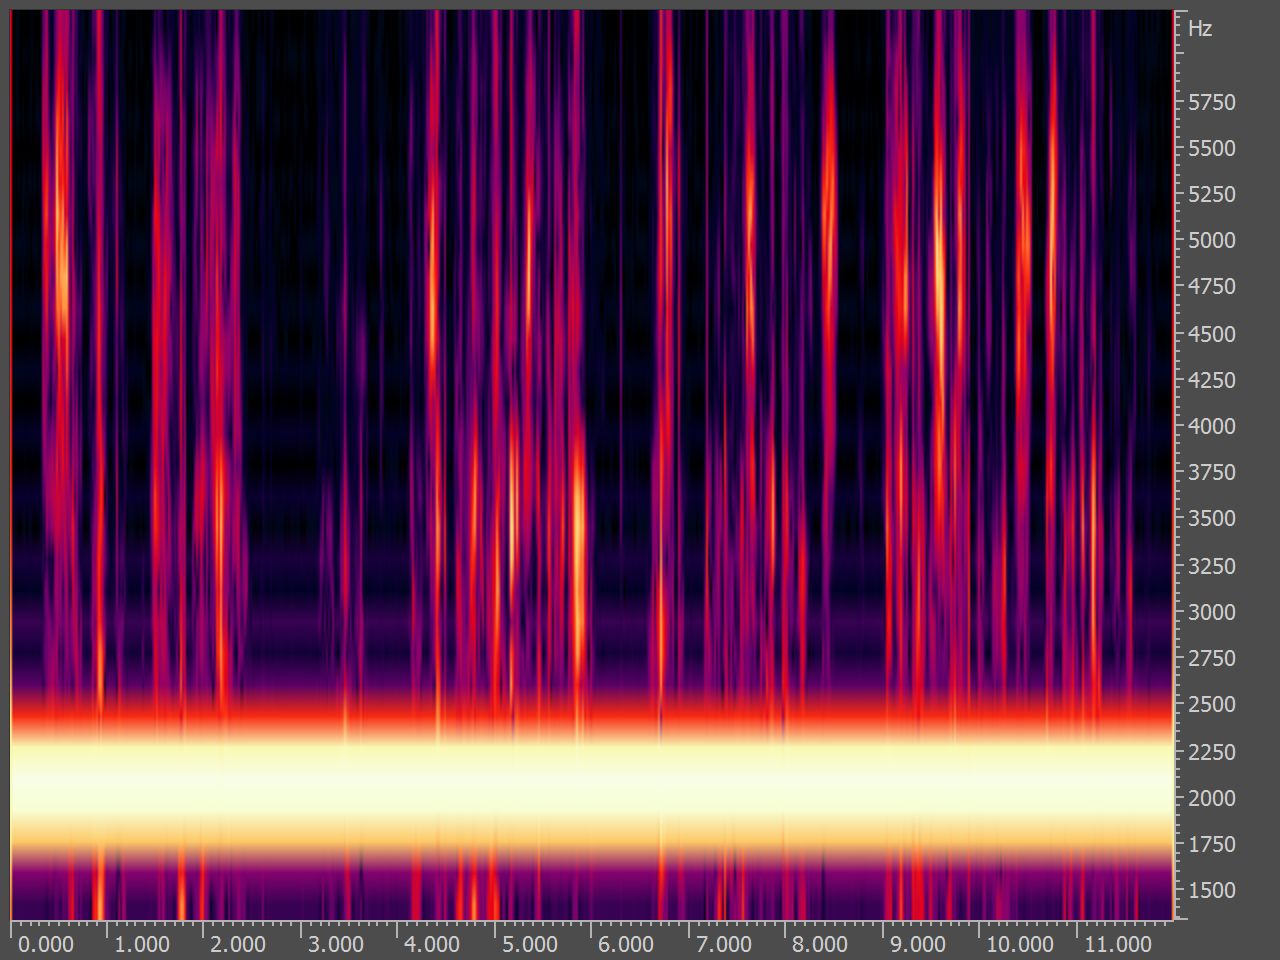

Agora aplicamos um filtro rejeita faixa com os seguintes parâmetros:
- Banda passante: 1067Hz
- Frequências de corte inferior e superior: 1609 Hz e 2514 Hz.
- Decaimento: 200dB/década
- Atenuação da banda passante: 3dB

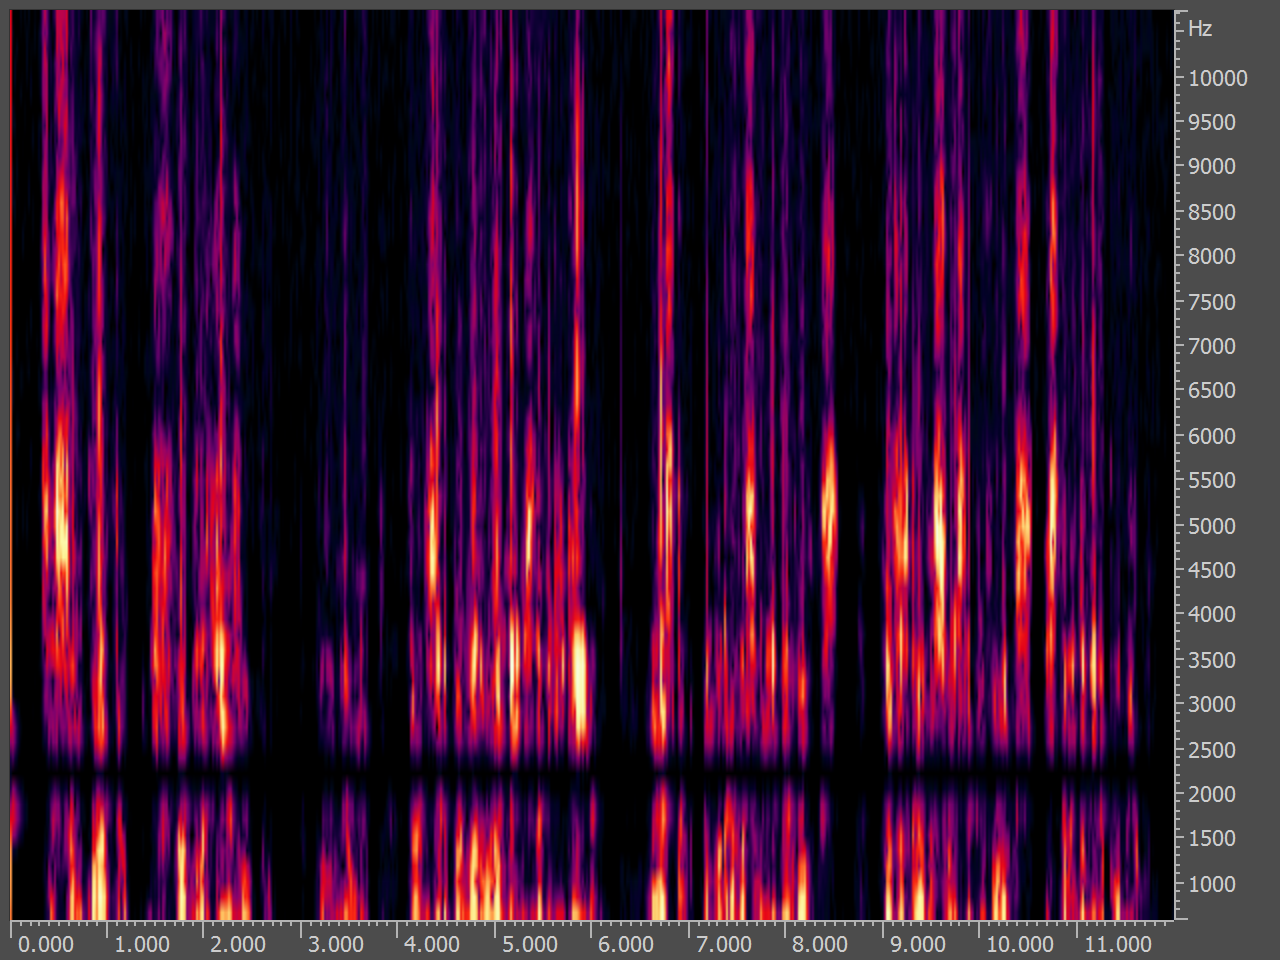

###Análise no Python

Agora, vamos visualizar via código python este sinal.

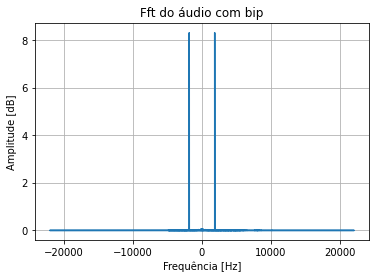

In [4]:
#o conteudo do link deve ser baixado e feito o upload na pasta do colab
[fs,audio] = wav.read('/content/audio-teste-ruido-Victoria.wav')
bip = audio/max(abs(audio))
fft = np.fft.fft(bip)
n = fft.size
freq = np.fft.fftfreq(n, 1/fs)

plt.plot(freq, abs(fft)*2/fs)
plt.grid()
plt.title("Fft do áudio com bip")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Amplitude [dB]")
#plt.savefig("fft_original.png")
#files.download("fft_original.png")
plt.show()

#### Definição das especificações

- Wp: frequência limite da banda de passagem (em rad/s);
- Ws: frequência limite da banda de rejeição (em rad/s);
- Wc: frequência de corte (em rad/s);
- Rp: máxima atenuação da banda de passagem (em dB, em Wp);
- Rs: mínima atenuação na banda de rejeição (em dB, em Ws)


In [5]:
#wc = (ws+wp)/2
fs=44110
# wc=2*np.pi*6906/fs
# ws = 2*np.pi*7500/fs
# wp = 2*np.pi*6500/fs

ws1 = 2*np.pi*1600/fs
wp1 = 2*np.pi*1609/fs
wp2 = 2*np.pi*2495/fs
ws2 = 2*np.pi*2500/fs

wc1 = (ws1+wp1)/2
wc2 = (wp2+ws2)/2

tr_width = min((wp1-ws1),(ws2-wp2))
M = np.ceil(11*np.pi/tr_width) + 2 # cálculo da ordem M
n=np.arange(M)
Rp = 1
As = 60

##### Uso da função firwin()

Firwin function: This function computes the coefficients of a finite impulse response filter.

In [6]:
b = signal.firwin(int(M), [wc1/np.pi,wc2/np.pi], pass_zero=False, window='blackman')

##### Função freqz modificada

Freqz function: Compute the frequency response of a digital filter.

In [7]:
def freqz_m(b,a):
    # Modified version of freqz subroutine
    # ------------------------------------
    # [db,mag,pha,grd,w] = freqz_m(b,a)
    #  db = Relative magnitude in dB computed over 0 to pi radians
    # mag = absolute magnitude computed over 0 to pi radians 
    # pha = Phase response in radians over 0 to pi radians
    # grd = Group delay over 0 to pi radians
    #   w = 501 frequency samples between 0 to pi radians
    #   b = numerator polynomial of H(z)   (for FIR: b=h)
    #   a = denominator polynomial of H(z) (for FIR: a=[1])
    #
    [w, H] = signal.freqz(b,a,worN=2048)
    db = 20*np.log10((np.abs(H))/np.max(np.abs(H)))
    w,grd = signal.group_delay((b,a),w)
    mag = np.abs(H)
    pha = np.angle(H)
    return db,mag,pha,grd,w

In [8]:
[db,mag,pha,grd,w] = freqz_m(b, a=1)

delta_w = np.pi/(len(w)-1)
#Rp_calculado = -(np.min(db[0:int(wp/delta_w+1):]))       
#As_calculado = -np.round(np.max(db[int(ws/delta_w):len(w)-1:]))

Rp_calculado = -(np.min(db[int(wp1/delta_w+1):int(wp2/delta_w+1):]))       
As_calculado = -np.round(np.max(db[int(ws2/delta_w):len(w)-1:]))

/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:685: UserWarning: The group delay is singular at frequencies [1.606, 1.646, 1.686, 1.706, 1.715, 1.726, 1.746, 1.766, 1.775, 1.786, 1.795, 1.805, 1.815, 1.825, 1.835, 1.845, 1.855, 1.865, 1.875, 1.885, 1.894, 1.905, 1.914, 1.925, 1.934, 1.945, 1.954, 1.965, 1.974, 1.985, 1.994, 2.005, 2.014, 2.025, 2.034, 2.036, 2.045, 2.054, 2.065, 2.074, 2.085, 2.092, 2.105, 2.114, 2.125, 2.134, 2.145, 2.154, 2.163, 2.164, 2.174, 2.184, 2.194, 2.203, 2.204, 2.214, 2.215, 2.224, 2.233, 2.243, 2.244, 2.253, 2.255, 2.263, 2.264, 2.273, 2.275, 2.284, 2.293, 2.303, 2.304, 2.313, 2.315, 2.322, 2.324, 2.333, 2.335, 2.344, 2.353, 2.355, 2.356, 2.364, 2.373, 2.375, 2.381, 2.384, 2.393, 2.395, 2.402, 2.404, 2.413, 2.414, 2.422, 2.424, 2.431, 2.433, 2.434, 2.442, 2.444, 2.453, 2.456, 2.462, 2.464, 2.473, 2.474, 2.476, 2.482, 2.484, 2.485, 2.493, 2.494, 2.502, 2.503, 2.513, 2.514, 2.522, 2.525, 2.533, 2.534, 2.542, 2.543, 2.545, 2.553, 2.554, 2

##### Função plot do plano z

In [9]:
def zplane(b,a,filename=None):
    ax = plt.subplot(111)

    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    print(f"polos:{p}, zeros:{z}, k:{k}") 

    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)
    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.show()

    return z, p, k

In [1]:
plt.figure()
plt.title("Diagrama de polos e zeros")
z,p,k = zplane(b, [1,0])
plt.show()

NameError: ignored

##### Visualizando respostas

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=1)

axs[0].set_title("Resposta ao impulso real")
axs[0].stem(n, b)
axs[0].grid()
axs[0].set_xlabel("n")
axs[0].set_ylabel("h[n]")

axs[1].set_title("Resposta magnitude em dB")
axs[1].plot(w/np.pi,db)
axs[1].grid()
axs[1].axhline(-Rp, color='r')
axs[1].axhline(-As, color='r')
axs[1].axvline(wp1/np.pi, color='r')
axs[1].axvline(ws1/np.pi, color='r')
axs[1].axvline(wp2/np.pi, color='r')
axs[1].axvline(ws2/np.pi, color='r')
axs[1].set_xlabel("frequência em unidades de pi")
axs[1].set_ylabel("dB")

fig.tight_layout()

fig, axs = plt.subplots(nrows=2, ncols=1)

axs[0].set_title("Fase")
axs[0].plot(w/np.pi,pha)
axs[0].grid()
axs[0].set_xlabel("frequência em unidades de pi")
axs[0].set_ylabel("rads")

axs[1].set_title("fase contínua")
axs[1].plot(w/np.pi,np.unwrap(pha))
axs[1].grid()
axs[1].set_xlabel("frequência em unidades de pi")
axs[1].set_ylabel("rads")

fig.tight_layout()


In [ ]:
sem_bip = signal.lfilter(b, a =1, x = bip)
sem_bip = sem_bip/max(abs(sem_bip))

fft_sem_bip = np.fft.fft(sem_bip)
n = fft_sem_bip.size
freq = np.fft.fftfreq(n, 1/fs)

plt.plot(freq,abs(fft_sem_bip)*2/fs)
plt.grid()
plt.title("Fft do áudio sem bip")
plt.xlabel("Frequência [Hz]")
plt.ylabel("Amplitude [dB]")
plt.show()